In [ ]:
# Support Vector Machine classification
# overview: https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
# https://scikit-learn.org/stable/modules/svm.html
# in depth: https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote09.html
# https://online.stat.psu.edu/stat857/node/211/
# IRIS dataset: https://en.wikipedia.org/wiki/Iris_flower_data_set
#  March 2023 / 2024

In [1]:
import os, sys
# mlxtend fix - do only once !
!pip install mlxtend==0.18.0


# C-Support Vector Classification.
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
# The implementation is based on libsvm.
# https://www.csie.ntu.edu.tw/~cjlin/libsvm/
# The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0


In [2]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
#from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

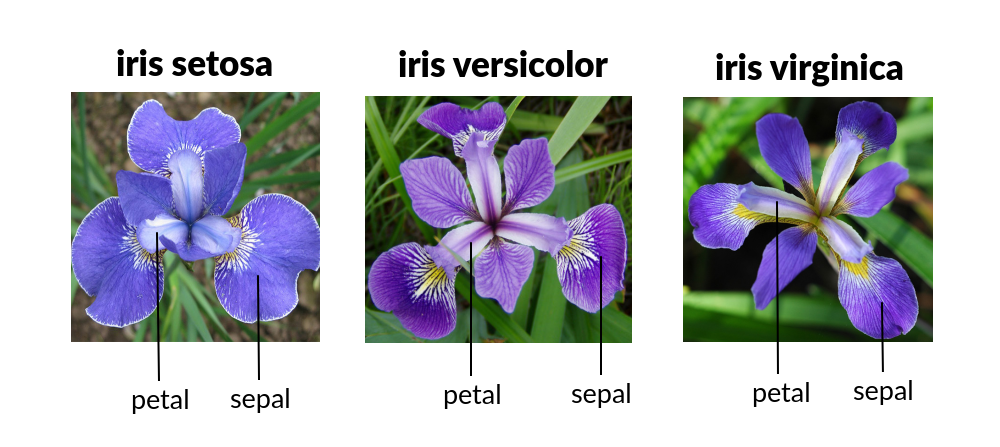

In [4]:
# Load the Iris data set
iris = datasets.load_iris()

# This line is simply to display the information - not used in the calculations
# Concat iris['feature_names'] list and string list
iris_datadisplay = pandas.DataFrame(data = numpy.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
print(iris_datadisplay.head());

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [5]:
# Define inputs and ouputs (target)
X = iris.data[:, 2:]
y = iris.target

In [8]:
# Create training/ test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [12]:
# Create the SVM model - pick linear, gaussian or polynomial kernel
#svm_classifier = SVC(kernel = 'linear', random_state = 0)
#svm_classifier = SVC(kernel = 'rbf', gamma=0.7)
svm_classifier = SVC(kernel = 'poly', degree=5, gamma="auto")

In [13]:
#Fit the model for the data
svm_classifier.fit(X_train, y_train)

SVC(degree=5, gamma='auto', kernel='poly')

In [14]:
#Make the prediction
y_pred = svm_classifier.predict(X_test)

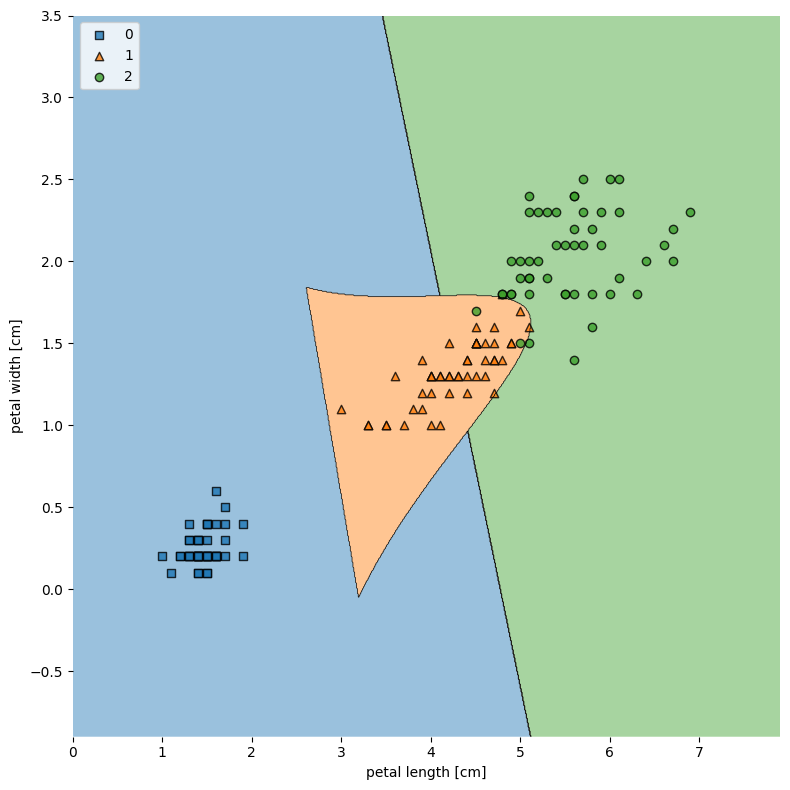

In [15]:
# Visualize the results of the svm classifier
from mlxtend.plotting import plot_decision_regions

X_combined = numpy.vstack((X_train, X_test))
y_combined = numpy.hstack((y_train, y_test))

# plot_decision_regions
fig, ax = plt.subplots(figsize=(8, 8))
plot_decision_regions(X_combined, y_combined, clf=svm_classifier)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
# Show the model accuraacy
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

accuracies = cross_val_score(estimator = svm_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy: 94.09 %
Standard Deviation: 6.58 %
